In [96]:
#############################
#Script = EM_GMM.R
#Author = Somnath Tagore
#Last Update = 03.20.2019
##############################

#Packages

library(tidyverse)
library(reshape2)
library(matrixStats)
library(dplyr)
library(Seurat)
library(gplots)
library(ggplot2)
library(purrr)
library(DropletUtils)
library(SingleCellExperiment)
library(scater)
library(Matrix)
library(celldex)
library(gridExtra)
library(mixtools)
library(hash)
library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
# load gene expression data/raw counts


In [97]:
##LOAD ALL SAMPLE H-MATRIX's

first_best_samples_H_matrix = c("Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv",
                     "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv",
                     "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv",
                     "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv",
                     "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv")
H.mat.list <- lapply(first_best_samples_H_matrix, function (x) read.csv(x))


In [98]:
##GOAL HERE: 

pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX',
              'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 
              'SarcomaS914GEX', 'SarcomaS956GEX' )

index <- 1


# A Hash Table, creating assigning each rank a list of its assigned barcodes
rank.cell.mappings <- hash() 


for (x in pat_list){
    print(first_best_samples_H_matrix[[index]])
    for (y in rownames(H.mat.list[[index]])){
        rank.cell.mappings[[paste0(x, ".", y)]] <- list()
        print(y)
    }
    for (y in colnames(H.mat.list[[index]])){
        rank <- which.max(H.mat.list[[index]][[y]])
        rank.cell.mappings[[paste0(x, ".", rank)]] <- append(rank.cell.mappings[[paste0(x, ".", rank)]], y)
    }
    index <- index + 1
}

[1] "Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"


In [99]:
#Load Seurat Objects for each sample here
pat_list <- c('Sarcoma167GEX', 'Sarcoma322GEX', 'Sarcoma559GEX', 'Sarcoma708GEX', 'SarcomaS408GEX', 'SarcomaS410GEX', 'SarcomaS914GEX', 'SarcomaS956GEX')
minFeature <- 300
minCount <- 600


object.list <- lapply(pat_list, function (x) readRDS(paste0("~/CompiledData/data/", x, "/data_", 
                                        x, "_genes_", minFeature, '_UMI_', minCount, '_annotated_for_infercnv.rds')))


In [100]:
#Another hash table: This time for each rank, its assigned Seurat Object

rank.cell.seurats <- hash() 



index <- 1           
for (x in pat_list){
    print(first_best_samples_H_matrix[[index]])
    for (y in rownames(H.mat.list[[index]])){
        temp <- RenameCells(object.list[[index]],
                            new.names =gsub(x = Cells(object.list[[index]]), pattern = "-", replacement = "."))
        for (z in colnames(df)){
            temp <- AddModuleScore(
                  object = temp,
                  features = list(as.vector(unlist(df[z],  use.names=FALSE))), 
                  name = paste0(z, "_metaprogram_genes"),
                  assay = "RNA"
                )
        }
        
        rank.cell.seurats[[paste0(x, ".", y)]] <- 
            subset(temp, cells=unlist(rank.cell.mappings[[paste0(x, ".", y)]], use.names=FALSE))
    }
    index <- index + 1
}

[1] "Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_4_H.csv"
[1] "Sarcoma322GEX/Sarcoma322GEX_KINOMO_nmf_rank_3_H.csv"
[1] "Sarcoma559GEX/Sarcoma559GEX_KINOMO_nmf_rank_3_H.csv"
[1] "Sarcoma708GEX/Sarcoma708GEX_KINOMO_nmf_rank_4_H.csv"
[1] "SarcomaS408GEX/SarcomaS408GEX_KINOMO_nmf_rank_3_H.csv"
[1] "SarcomaS410GEX/SarcomaS410GEX_KINOMO_nmf_rank_3_H.csv"
[1] "SarcomaS914GEX/SarcomaS914GEX_KINOMO_nmf_rank_3_H.csv"
[1] "SarcomaS956GEX/SarcomaS956GEX_KINOMO_nmf_rank_5_H.csv"


In [101]:
#Manual Assginment of ranks to MetaPrograms

MP1 = c('Sarcoma322GEX.3', 'SarcomaS410GEX.3', 'SarcomaS914GEX.2', 'SarcomaS956GEX.2', 'SarcomaS956GEX.4')

#Index(['V2_167', 'V2_708', 'V1_S408', 'V1_S410', 'V3_S914', 'V5_S956'], dtype='object')

MP2 = c('Sarcoma167GEX.2','Sarcoma708GEX.2','SarcomaS408GEX.1', 'SarcomaS410GEX.1' , 
        'SarcomaS914GEX.3','SarcomaS956GEX.5')

#Index(['V3_559', 'V4_708', 'V3_S408'], dtype='object')

MP3 = c('Sarcoma559GEX.3', 'Sarcoma708GEX.4', 'SarcomaS408GEX.3')

#Index(['V3_167', 'V2_322', 'V2_559', 'V3_708'], dtype='object')

MP4 = c('Sarcoma167GEX.3', 'Sarcoma322GEX.2', 'Sarcoma559GEX.2', 'Sarcoma708GEX.3')

#Index(['V1_167', 'V4_167', 'V1_708', 'V2_S408'], dtype='object')

MP5 = c('Sarcoma167GEX.1', 'Sarcoma167GEX.4', 'Sarcoma708GEX.1', 'SarcomaS408GEX.2')

#Index(['V1_322', 'V2_S410', 'V1_S914', 'V3_S956'], dtype='object')

MP6 = c('Sarcoma322GEX.1', 'SarcomaS410GEX.2', 'SarcomaS914GEX.1', 'SarcomaS956GEX.3')


MP7 = c('Sarcoma559GEX.3')

MPs = list(MP1, MP2, MP3, MP4, MP5, MP6, MP7)


In [102]:
#Create a List of Seurat Objects for each MetaProgram

MP_seurats = c()
for (i in MPs){
    t_list <- c()
    for (j in i){
        t_list <- c(t_list,rank.cell.seurats[[j]] )    
    }

    if(length(i) >= 2){    
        print(i)
        merged <- merge(rank.cell.seurats[[i[1]]], y =t_list[2:length(t_list)] ,
                        add.cell.ids = as.vector(i))
        MP_seurats <- c(MP_seurats, merged)

    }else{
        MP_seurats <- c( MP_seurats, rank.cell.seurats[[i[1]]])
    }
        
    
}

[1] "Sarcoma322GEX.3"  "SarcomaS410GEX.3" "SarcomaS914GEX.2" "SarcomaS956GEX.2"
[5] "SarcomaS956GEX.4"
[1] "Sarcoma167GEX.2"  "Sarcoma708GEX.2"  "SarcomaS408GEX.1" "SarcomaS410GEX.1"
[5] "SarcomaS914GEX.3" "SarcomaS956GEX.5"
[1] "Sarcoma559GEX.3"  "Sarcoma708GEX.4"  "SarcomaS408GEX.3"
[1] "Sarcoma167GEX.3" "Sarcoma322GEX.2" "Sarcoma559GEX.2" "Sarcoma708GEX.3"
[1] "Sarcoma167GEX.1"  "Sarcoma167GEX.4"  "Sarcoma708GEX.1"  "SarcomaS408GEX.2"
[1] "Sarcoma322GEX.1"  "SarcomaS410GEX.2" "SarcomaS914GEX.1" "SarcomaS956GEX.3"


In [103]:
df = t(read.csv("Sarcoma167GEX/Sarcoma167GEX_KINOMO_nmf_rank_5_H.csv"))
colnames(df) <- unlist(df[1, ])

# Remove the first row from the dataframe
df <- df[-1, ]

df

,1,2,3,4,5
AGTCTTTTCGCGTTTC.1,2.207260e-03,3.176844e-02,2.220446e-16,2.220446e-16,2.220446e-16
AATCGGTTCTGGCGTG.1,1.152191e-03,2.651233e-02,2.263688e-15,1.853526e-04,6.376748e-03
CCTAGCTGTACATCCA.1,1.512912e-02,1.149542e-02,2.220446e-16,2.308961e-10,2.220446e-16
CGTGTCTGTTCCAACA.1,4.704831e-03,1.869223e-02,2.220446e-16,2.220446e-16,9.561895e-03
CACATTTAGCCTTGAT.1,2.220446e-16,2.220446e-16,1.215791e-03,3.534146e-02,2.910659e-03
GCCTCTATCAATAAGG.1,3.299559e-02,6.771755e-03,2.220446e-16,2.220446e-16,2.761079e-02
CGTCACTAGAGCTATA.1,2.594524e-03,2.567938e-02,9.332172e-04,3.651340e-04,2.220446e-16
AGACGTTAGCGATCCC.1,2.220446e-16,2.935386e-02,2.220446e-16,2.220446e-16,2.220446e-16
CCAATCCGTCATCGGC.1,2.220446e-16,2.220446e-16,2.220446e-16,2.845000e-02,2.220446e-16
TTAGTTCAGTTTGCGT.1,2.654076e-02,1.715856e-02,2.802878e-04,1.004424e-11,3.942903e-03


In [104]:
##This a dataframe of the top 100 genes assigned to each metaprogram

df <- read.csv("t100_genes_per_metaprogram_6_MP.csv")
gene_list <- unique(unname(unlist(head(df, 20))))

df

MP_0,MP_1,MP_2,MP_3,MP_4,MP_5,MP_6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
MALAT1,MALAT1,MALAT1,MALAT1,MALAT1,FP236383.3,MALAT1
RBMS3,NEAT1,NEAT1,PTPRC,FN1,FP671120.4,NEAT1
AUTS2,LRMDA,FP236383.3,MBNL1,COL3A1,COL1A2,FP236383.3
FP236383.3,PLXDC2,ZBTB20,ARHGAP15,COL1A2,COL1A1,CD74
MBNL1,DPYD,QKI,PRKCH,FP236383.3,COL6A2,ZEB2
PTPRG,DOCK4,XIST,RABGAP1L,COL6A3,VIM,SAT1
LRMDA,CHST11,FNDC3B,CBLB,COL1A1,ACTB,LRMDA
NEAT1,ZEB2,PPP2R2B,SKAP1,EXT1,EEF1A1,PLXDC2
MIR99AHG,AKAP13,PDE4B,PARP8,GPC6,COL6A1,DPYD


In [105]:
# or use the tpm normalization

MP_list = c('MP1', 'MP2', 'MP3', 'MP4', 'MP5', 'MP6', 'MP7')


#Many genes will not effectively run MP's - this is an object to store such a list
error_list_genes = list()

#This is a list of the GMM Scores for each gene
gene_df_mapping <- list(c(), c(), c(), c(), c(), c(), c())

#This is a list of genes (associated with the score from the list above)
#There are better ways to store this data. This was quickly written
gene_list_mapping <- list(c(), c(), c(), c(), c(), c(), c())

#Mixture model implementation
#Select one gene at a time
#gene_exp<-matrix(rnorm(36),nrow=1)
index <- 0


for (y in MP_seurats){
    
    #Create a Matrix of the Seurat Object for a Given MP
    t <- y[, sample(colnames(y), size = 1000, replace=F)]
    seu <- NormalizeData(t, normalization.method = "LogNormalize", scale.factor = 1000)
    seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 2000)
    seu <- ScaleData(seu, features = rownames(seu))
    index <- index + 1 
    gene_exp.copy1 <- as.matrix(GetAssayData(seu))
    
    
    
    #For Each Gene Run GMM
    #This step requires much fine-tuning
    for (x in 1:length(gene_list)){
        
        tryCatch(
            expr = {

                gene_exp<-gene_exp.copy1[gene_list[x],]

                mygrobsem<-list()
                gg.mixEM <- function(EM, gene) {
                #  require(ggplot2)
                  x       <- with(EM,seq(min(x),max(x),len=1000))
                  pars    <- with(EM,data.frame(comp=colnames(posterior), mu, sigma,lambda))
                  em.df   <- data.frame(x=rep(x,each=nrow(pars)),pars)
                  em.df$y <- with(em.df,lambda*dnorm(x,mean=mu,sd=sigma))

                  saveRDS(em.df , paste0('EM_GMM_Output_Files/', MP_list[[index]],"/", gene, "em.df.rds"))

                  ggplot(data.frame(x=EM$x),aes(x,y=..density..)) + 
                    #type = rep(c('tumor', 'normal'), c(503,313)) +
                    #geom_histogram(fill=NA,color="black")+
                    geom_polygon(data=em.df,aes(x,y,fill=comp),color="grey50", alpha=0.5)+
                    #geom_polygon(data=em.df,aes(x,y,fill=type),color="grey50", alpha=0.5)+
                    scale_fill_discrete("Component\nMeans",labels=format(em.df$mu,digits=3))+
                   # scale_fill_discrete("Component\nSD",labels=format(em.df$sd,digits=3))+
                    theme_bw()
                #  print(em.df$sd)
                  #print(em.df)

                }

                set.seed(1)    # for reproducible example

                # k	= Number of components. Initial value ignored unless mu and sigma are both NULL.
                #gene_exp_gmm <- normalmixEM(gene_exp, k =2, lambda=NULL)
                #gene_exp_gmm <- normalmixEM(as.matrix(GetAssayData(gene_exp)), 
                #                            lambda=NULL, mu=NULL, sigma=NULL)
                
                
                
                # COnsider Changing the K-Value (Not sure based on what exactly) 
                gene_exp_gmm <- normalmixEM(gene_exp, 
                                            lambda=NULL, mu=NULL, sigma=NULL, k=2)
                mygrobsem_gene_exp_gmm<-gg.mixEM(gene_exp_gmm, gene_list[x])     

                pdf(file = paste0('EM_GMM_Output_Files/', MP_list[[index]], "/", gene_list[x],"gmm.pdf"), width = 5, height = 5, family = "Times", pointsize = 10)

                    print(mygrobsem_gene_exp_gmm)
                dev.off()

                em.df<- readRDS(file=paste0('EM_GMM_Output_Files/', MP_list[[index]], '/', gene_list[x], "em.df.rds"))
                # em.df %>%
                #   group_by(comp) %>%
                #   summarise_at(vars(y), list(name = mean))
                

                aggregate(em.df, list(em.df$comp), mean)
                
                #Store the Max MU Mean in gene_df_mapping, with the index matching its MP
                #Store the Gene in gene_list_mapping, with the index matching its MP
                #these two list should have the same length

                print(max(aggregate(em.df, list(em.df$comp), mean)$mu))
                gene_df_mapping[[index]] <- c(gene_df_mapping[[index]], max(aggregate(em.df, list(em.df$comp), mean)$mu))
                gene_list_mapping[[index]] <- c(gene_list_mapping[[index]], gene_list[x])

            },
            error = function(e){
                message('Caught an error!')
                print("adding to list")
                #store gene that throws error. Replace gene_df_mapping with 0
                
                error_list_genes <- append(error_list_genes, c(MP_list[[index]], gene_list[x]))

                print(e)
            }    
        )
    }
}
#Select the component with hightest Mean to be the average expression of that gene


Centering and scaling data matrix



number of iterations= 241 
[1] 3.155909
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.728045
number of iterations= 380 
[1] 1.420787
number of iterations= 102 
[1] 1.982068
One of the variances is going to zero;  trying new starting values.
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.350122
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.9947475
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 79 
[1] 1.399999
number of iterations= 471 
[1] 1.45262
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 55 
[1] 0.968615
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.357676
One of the variances is going to zero;  trying new starting values.
One of the varianc

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 325 
[1] 0.7819379
One of the variances is going to zero;  trying new starting values.
number of iterations= 242 
[1] 1.090954
One of the variances is going to zero;  trying new starting values.
number of iterations= 249 
[1] 1.475603
number of iterations= 48 
[1] 1.32737
number of iterations= 306 
[1] 0.8993883
number of iterations= 228 
[1] 0.8374286
One of the variances is going to zero;  trying new starting values.
number of iterations= 177 
[1] 0.9247582
One of the variances is going to zero;  trying new starting values.
number of iterations= 239 
[1] 0.5275431
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One o

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 242 
[1] 1.268976
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 398 
[1] 0.5668803
number of iterations= 785 
[1] 0.6511516
One of the variances is going to zero;  trying new starting values.
number of iterations= 96 
[1] 0.3933743
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 565 
[1] 0.606038
number of iterations= 186 
[1] 0.8120286
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.554496
number of iterations= 960 
[1] 0.8616924
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 145 
[1] 1.532665
number of iterations= 413 
[1] 1.151734


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 102 
[1] 1.416363
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 847 
[1] 0.7678036


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 123 
[1] 0.6499161
number of iterations= 794 
[1] 1.424986
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 172 
[1] 0.4220784
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 396 
[1] 1.110819
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 279 
[1] 2.475213
number of iterations= 271 
[1] 1.358883
One of the variances is going to zero;  trying new starting values.
number of iterations= 210 
[1] 0.6957781
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.158636
number of iterations= 247 
[1] 0.6344209
number of iterations= 359 
[1] 0.8540496
number of iterations= 114 
[1] 0.5992101
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 248 
[1] 0.6558218
One of the variances is going to zero;  trying new starting values.
number of iterations= 87 
[1] 0.670656
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 472 
[1] 0.6917136
number of iterations= 96 
[1] 0.5605527
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 131 
[1] 1.865413
number of iterations= 123 
[1] 0.6288769
number of iterations= 241 
[1] 0.7654566
number of iterations= 136 
[1] 0.5826998
number of iterations= 272 
[1] 0.8841832
number of iterations= 139 
[1] 1.064902
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 222 
[1] 0.9338522
One of the variances is going to zero;  trying new starting values.
number of iterations= 463 
[1] 1.366474
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.319937
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starti

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 565 
[1] 0.5513578
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 503 
[1] 0.6154857
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



number of iterations= 129 
[1] 2.998332
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of t

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 487 
[1] 1.32382
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 282 
[1] 1.62573
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 176 
[1] 0.6067865
One of the variances is going to zero;  trying new starting values.
number of iterations= 151 
[1] 0.8693802
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 21 
[1] 1.077617
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 201 
[1] 1.478684
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 332 
[1] 1.039203
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 242 
[1] 1.289905
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 236 
[1] 0.7796019


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
number of iterations= 228 
[1] 1.292242
One of the variances is going to zero;  trying new starting values.
number of iterations= 257 
[1] 1.277186
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 99 
[1] 0.7510843
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 234 
[1] 0.7481647
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 249 
[1] 0.8706189
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 189 
[1] 0.920161
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 263 
[1] 0.85974
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 152 
[1] 1.18661
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



number of iterations= 87 
[1] 3.216423
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of th

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 86 
[1] 2.37292
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varianc

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 153 
[1] 0.73355
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 101 
[1] 0.7736862
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 626 
[1] 0.7438975
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 250 
[1] 1.314962
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 152 
[1] 0.7162315
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 225 
[1] 0.7043691
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 394 
[1] 0.7652603
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



number of iterations= 92 
[1] 3.138273
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of th

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 752 
[1] 1.126535
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 142 
[1] 0.6145332
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 238 
[1] 1.145582
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 28 
[1] 0.9128904
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 363 
[1] 1.063114
One of the variances is going to zero;  trying new starting values.
number of iterations= 357 
[1] 1.083789
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 28 
[1] 0.9540114
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 318 
[1] 0.9242027
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 341 
[1] 1.006085
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 988 
[1] 1.650194
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 111 
[1] 1.503558
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 239 
[1] 1.195413
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 23 
[1] 0.8636563
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 152 
[1] 0.8218866
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 285 
[1] 1.694626
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 265 
[1] 1.392305
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 246 
[1] 0.7806828
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



number of iterations= 227 
[1] 2.636162
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of t

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 150 
[1] 0.4944728
number of iterations= 186 
[1] 1.586001
One of the variances is going to zero;  trying new starting values.
number of iterations= 273 
[1] 0.5990259
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 195 
[1] 1.388484
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 134 
[1] 1.550208
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 172 
[1] 0.7587615
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 174 
[1] 1.733833
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 479 
[1] 2.29685
number of iterations= 667 
[1] 2.343553
One of the variances is going to zero;  trying new starting values.
number of iterations= 122 
[1] 0.533678
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One o

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 249 
[1] 0.5696666
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 625 
[1] 1.501634
One of the variances is going to zero;  trying new starting values.
number of iterations= 267 
[1] 0.7747335
One of the variances is going to zero;  trying new starting values.
number of iterations= 302 
[1] 0.7263108
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
On

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 186 
[1] 0.5181814
One of the variances is going to zero;  trying new starting values.
number of iterations= 360 
[1] 0.6357588
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 150 
[1] 0.6779331
number of iterations= 144 
[1] 0.5759113
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tr

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 223 
[1] 0.6224139
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 488 
[1] 0.9139612


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 192 
[1] 0.6067667
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 977 
[1] 1.821104
One of the variances is going to zero;  trying new starting values.
number of iterations= 140 
[1] 1.802641
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 240 
[1] 1.480403
One of the variances is going to zero;  trying new starting values.
number of iterations= 131 
[1] 1.408507
One of the variances is going to zero;  trying new starting values.
number of iterations= 136 
[1] 1.497332
One of the variances is going to zero;  trying new starting values.
number of iterations= 470 
[1] 1.455836
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.407764
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.073617
number of iterations= 192 
[1] 1.061048
number of iterations= 202 
[1] 1.077663
number of iterations= 125 
[1] 0.9292718
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 0.9191465
One of the variances is going to zero;  trying new starting values.
number of iterations= 192 
[1] 1.128113
One of the variances is going to zero;  trying new starting values.
number of

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 71 
[1] 0.8899054
One of the variances is going to zero;  trying new starting values.
number of iterations= 147 
[1] 0.6699725
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  try

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 136 
[1] 0.6543973
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying n

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 107 
[1] 4.652522
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterations= 26 
[1] 1.461476
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 41 
[1] 3.673556
One of the variances is going to zero;  trying new starting values.
number of iterations= 96 
[1] 0.8354891
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 387 
[1] 0.8381873
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 215 
[1] 0.7557112
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): NA/NaN/Inf in foreign function call (arg 4)>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is goin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 104 
[1] 0.7852165
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
[1] 1.479228
One of the variances is going to zero;  trying new starting values.
number of iterations= 464 
[1] 1.391447
number of iterations= 176 
[1] 1.658442
One of the variances is going to zero;  trying new starting values.
number of iterations= 149 
[1] 0.8122577
One of the variances is going to zero;  trying new starting values.
number of iterations= 208 
[1] 1.338106
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 130 
[1] 0.793896
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 196 
[1] 1.535817
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
number of iterat

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 63 
[1] 1.201713
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


Centering and scaling data matrix



number of iterations= 51 
[1] 3.596541
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of th

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 445 
[1] 2.644172
One of the variances is going to zero;  trying new starting values.
number of iterations= 311 
[1] 1.073914
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryi

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 308 
[1] 1.339504
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 191 
[1] 0.6103137
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 255 
[1] 0.6974275
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 212 
[1] 0.6484565
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 156 
[1] 0.6083044
One of the variances is going to zero;  trying new starting values.
number of iterations= 221 
[1] 0.9087148
One of the variances is going to zero;  trying new starting values.
number of iterations= 228 
[1] 0.8424519
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
O

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 182 
[1] 0.5549525
number of iterations= 70 
[1] 1.59396
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  tryin

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
number of iterations= 141 
[1] 1.19158
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varian

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 237 
[1] 1.007556
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 98 
[1] 0.8906926
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 730 
[1] 0.544087
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the varia

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
number of iterations= 179 
[1] 0.8365658
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the vari

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new starting values.
One of the variances is going to zero;  trying new start

Caught an error!



[1] "adding to list"
<simpleError in normalmixEM(gene_exp, lambda = NULL, mu = NULL, sigma = NULL,     k = 2): Too many tries!>


In [106]:
#Turn gene_df_mappingm and gene_list_mapping into a matrix

heat_map_df <- list(c(), c(), c(), c(), c(), c(), c())

for (x in 1:length(gene_list)){
    for (y in 1:length(MP_seurats)){
        gene_list_mapping[[y]]
        if(gene_list[x] %in% gene_list_mapping[[y]]){
            print(match(gene_list[x],gene_list_mapping[[y]])[1])
            print(gene_df_mapping[[y]][[match(gene_list[x],gene_list_mapping[[y]])[1]]])
            heat_map_df[[y]] <- c(heat_map_df[[y]], gene_df_mapping[[y]][[match(gene_list[x],gene_list_mapping[[y]])[1]]])
        }else{
            heat_map_df[[y]] <- c(heat_map_df[[y]], 0)

        }
    }
}

         

[1] 1
[1] 3.155909
[1] 1
[1] 2.998332
[1] 1
[1] 3.216423
[1] 1
[1] 3.138273
[1] 1
[1] 2.636162
[1] 1
[1] 3.596541
[1] 2
[1] 1.728045
[1] 3
[1] 1.420787
[1] 2
[1] 0.4944728
[1] 4
[1] 1.982068
[1] 2
[1] 2.37292
[1] 3
[1] 1.586001
[1] 1
[1] 4.652522
[1] 2
[1] 2.644172
[1] 5
[1] 1.350122
[1] 2
[1] 1.32382
[1] 4
[1] 0.5990259
[1] 3
[1] 1.073914
[1] 6
[1] 0.9947475
[1] 7
[1] 1.399999
[1] 8
[1] 1.45262
[1] 3
[1] 1.62573
[1] 2
[1] 1.126535
[1] 5
[1] 1.388484
[1] 9
[1] 0.968615
[1] 10
[1] 1.357676
[1] 6
[1] 1.550208
[1] 2
[1] 1.461476
[1] 11
[1] 0.7819379
[1] 7
[1] 0.7587615
[1] 12
[1] 1.090954
[1] 13
[1] 1.475603
[1] 8
[1] 1.733833
[1] 14
[1] 1.32737
[1] 3
[1] 3.673556
[1] 4
[1] 1.339504
[1] 15
[1] 0.8993883
[1] 9
[1] 2.29685
[1] 4
[1] 0.8354891
[1] 16
[1] 0.8374286
[1] 4
[1] 0.6067865
[1] 10
[1] 2.343553
[1] 17
[1] 0.9247582
[1] 5
[1] 0.8693802
[1] 3
[1] 0.73355
[1] 3
[1] 0.6145332
[1] 11
[1] 0.533678
[1] 5
[1] 0.6103137
[1] 18
[1] 0.5275431
[1] 19
[1] 1.268976
[1] 4
[1] 1.145582
[1] 6
[1] 1.

In [107]:
heat.map<- data.frame(Reduce(rbind ,heat_map_df))
rownames(heat.map) <- MP_list
colnames(heat.map) <- gene_list
t(heat.map)
heat.map<- as.matrix(sapply(as.data.frame(t(heat.map)), as.numeric))  


,MP1,MP2,MP3,MP4,MP5,MP6,MP7
MALAT1,3.1559091,2.9983321,3.2164231,3.1382735,2.6361624,0.0000000,3.5965411
RBMS3,1.7280450,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
AUTS2,1.4207868,0.0000000,0.0000000,0.0000000,0.4944728,0.0000000,0.0000000
FP236383.3,1.9820683,0.0000000,2.3729198,0.0000000,1.5860008,4.6525221,2.6441720
MBNL1,1.3501217,1.3238200,0.0000000,0.0000000,0.5990259,0.0000000,1.0739143
PTPRG,0.9947475,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
LRMDA,1.3999993,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
NEAT1,1.4526204,1.6257301,0.0000000,1.1265350,1.3884844,0.0000000,0.0000000
MIR99AHG,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
TENM3,0.9686150,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [108]:
t_heat.map <- as.data.frame(heat.map)
t_heat.map[["Max"]] <- colnames(heat.map)[max.col(heat.map,ties.method="first")]

t_heat.map

MP1,MP2,MP3,MP4,MP5,MP6,MP7,Max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.1559091,2.9983321,3.2164231,3.1382735,2.6361624,0.0000000,3.5965411,MP7
1.7280450,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,MP1
1.4207868,0.0000000,0.0000000,0.0000000,0.4944728,0.0000000,0.0000000,MP1
1.9820683,0.0000000,2.3729198,0.0000000,1.5860008,4.6525221,2.6441720,MP6
1.3501217,1.3238200,0.0000000,0.0000000,0.5990259,0.0000000,1.0739143,MP1
0.9947475,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,MP1
1.3999993,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,MP1
1.4526204,1.6257301,0.0000000,1.1265350,1.3884844,0.0000000,0.0000000,MP2
0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,MP1


In [109]:
#removal of the 7th MP - only one rank
rownames(heat.map) <- gene_list
heat.map<- heat.map[, -7]

In [110]:
write.csv(heat.map, "unscaled_heatmap_t20_genes.csv")

In [111]:
scaled.heat.map <- t(apply(heat.map, 1, function(x)(x-min(x))/(max(x)-min(x))))
#scaled.heat.map<-scaled.heat.map[rowSums(scaled.heat.map[,-1])> 1,]
scaled.heat.map<-scaled.heat.map[rowSums(is.na(scaled.heat.map)) != ncol(scaled.heat.map), ]


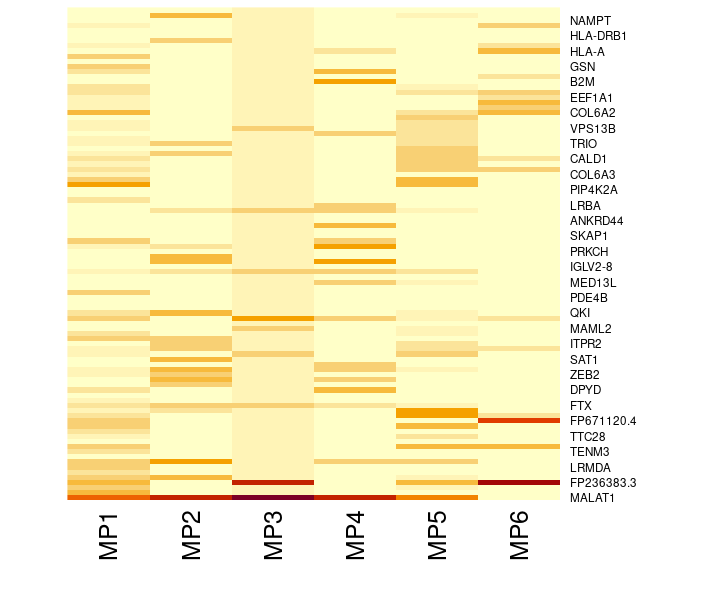

In [112]:
heatmap(heat.map, Colv = NA, Rowv = NA, scale="column")

In [113]:
heat.map<-read.csv("unscaled_em_gmm_output_t50.csv")
t_heat.map <- as.data.frame(heat.map)

rownames(heat.map) <- heat.map$Unnamed..0
         
         
heat.map <- heat.map[c("MP1","MP2","MP3","MP4","MP5","MP6")]


t_heat.map[["Max"]] <- colnames(heat.map)[max.col(heat.map,ties.method="first")]
rownames(t_heat.map) <- t_heat.map$Unnamed..0

t_heat.map

,Unnamed..0,MP1,MP2,MP3,MP4,MP5,MP6,Max
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCF4,TCF4,0.0000000,0.0000000,0.7263154,0.0000000,0.0000000,0.0000000,MP3
ATG7,ATG7,0.0000000,0.8793797,0.0000000,0.0000000,0.0000000,0.0000000,MP2
KCNMA1,KCNMA1,0.0000000,1.2633982,0.0000000,0.0000000,0.0000000,0.0000000,MP2
PSAP,PSAP,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8146100,MP6
UBE2E2,UBE2E2,0.4683059,0.8009265,0.0000000,0.0000000,0.4864155,0.0000000,MP2
PPIA,PPIA,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8080121,MP6
HSP90AB1,HSP90AB1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7839207,MP6
ACTG1,ACTG1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8680159,MP6
FGFR1,FGFR1,0.5250377,0.0000000,0.0000000,0.0000000,0.0000000,0.7897960,MP6


In [114]:
#certain levels of filtering and scaling and coloring changes are needed to clean this up. 
#This was done in python. Will send seperate notebook



In [115]:
samp <- "MP1"
genes <- rownames(filter(t_heat.map, Max == samp))
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
mylist <-  read.csv(file="t100_genes_per_metaprogram.csv")
dbs <- c("MSigDB_Hallmark_2020","MSigDB_Hallmark_2020")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[2]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_6 <- rbind.data.frame(mut_enr_ch,mut_enr_go)

mut_enr <- rbind.data.frame(mut_enr_ch,mut_enr_go)

dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr_mp6 <- mut_enr[1:25,]#[1:500,]

h_mut_enr_mp6 <- h_mut_enr1


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


[1] 21 10

[1] 21 10

[1] 42 10

In [116]:
samp <- "MP1"
genes <- rownames(filter(t_heat.map, Max == samp))
genes

[1] "VCAN"      "COL4A1"    "DYNC1H1"   "S100A6"    "HSP90AA1"  "SRRM2"    
 [7] "H3F3B"     "APP"       "MYH9"      "HNRNPA2B1" "FSTL1"     "GSN"      
[13] "COL5A1"    "COL6A2"    "FBN1"      "EBF1"      "COL6A3"    "DDX17"    
[19] "KANSL1"    "MYCBP2"    "SMCHD1"    "FYN"       "SND1"      "PCDH9"    
[25] "GNAQ"      "MACF1"     "UTRN"      "DPYD"      "SPIDR"     "GSE1"     
[31] "FOXN3"     "IMMP2L"    "CBLB"      "STAG1"     "FOXP1"     "STK3"     
[37] "ZBTB20"    "FTX"       "KAZN"      "TTC28"     "TENM3"     "LRMDA"    
[43] "PTPRG"     "AUTS2"     "RBMS3"

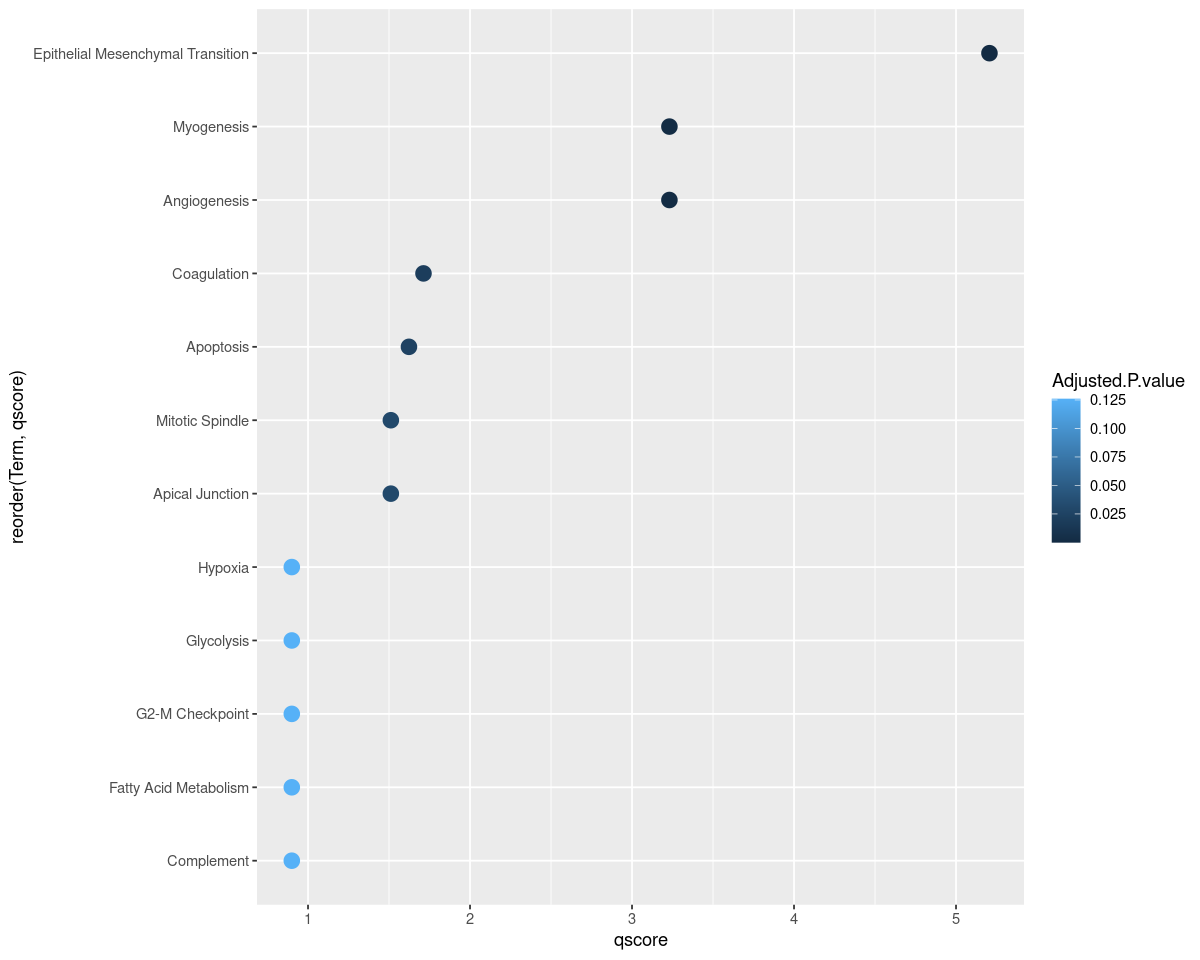

In [117]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

ggplot(h_mut_enr_mp6[1:12,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value)) +
  geom_point(size = 4)

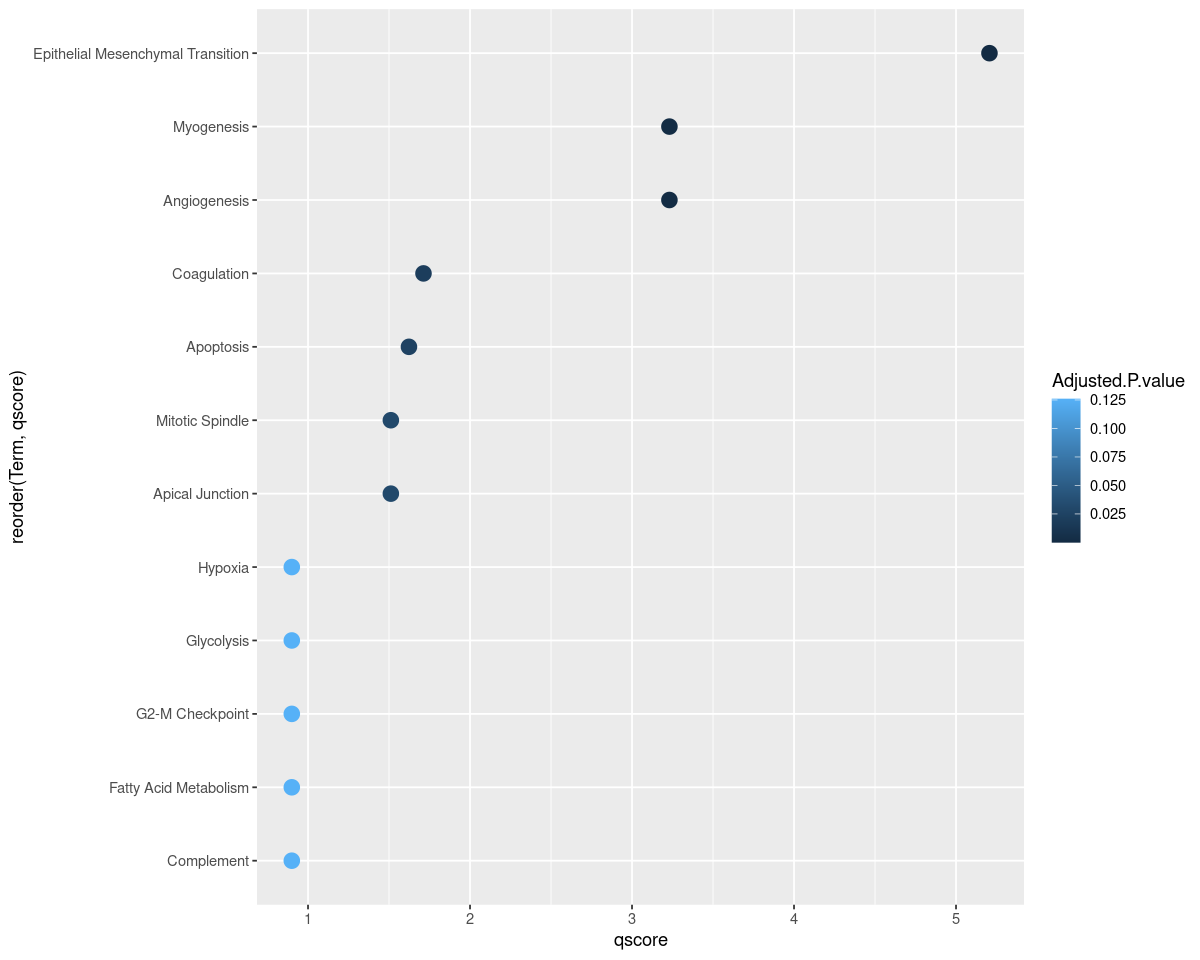

In [118]:
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

ggplot(h_mut_enr_mp6[1:12,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value)) +
  geom_point(size = 4)

In [119]:
samp <- "MP2"
genes <- rownames(filter(t_heat.map, Max == samp))

# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
mylist <-  read.csv(file="t100_genes_per_metaprogram.csv")
dbs <- c("MSigDB_Hallmark_2020")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
mut_enr <- mut_enr_ch
dim(mut_enr)
enrichdbs = "MSigDB_Hallmark_2020"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


[1] 13 10

[1] 13 10

 [1] "ATG7"     "KCNMA1"   "UBE2E2"   "ARHGAP15" "TBC1D5"   "ARHGAP26"
 [7] "RNF213"   "CD74"     "FCHSD2"   "ETV6"     "SFMBT2"   "QKI"     
[13] "PICALM"   "ITPR2"    "SAT1"     "AKAP13"   "ZEB2"     "CHST11"  
[19] "DOCK4"    "LPP"      "MBNL1"   


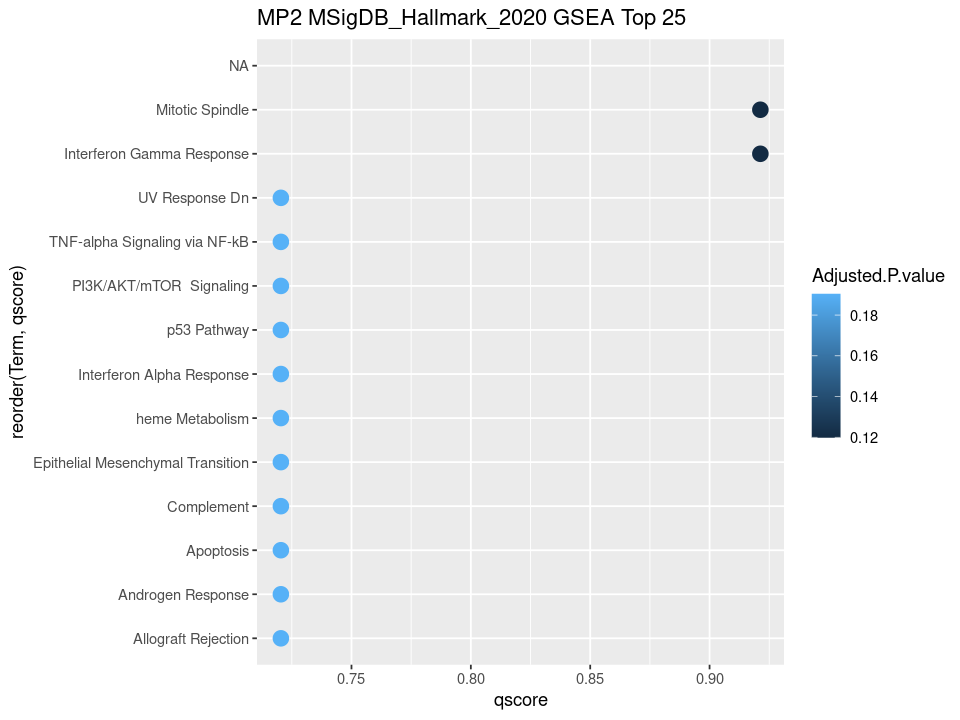

In [120]:
library(repr)
print(genes)


#df = df[["MP4" , "MP2", "MP1", "MP3", "MP5", "MP6"]]
#df.columns = ["MP1",  "MP2", "MP3", "MP4", "MP5", "MP6"]

samp = "MP2"
options(repr.plot.width=8, repr.plot.height=6)

ggplot(h_mut_enr1[1:25,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value)) +
  geom_point(size = 4) + ggtitle(paste0(samp ," MSigDB_Hallmark_2020 GSEA Top 25"))
  #+scale_color_gradient(limits = c(0, 1)
                      

In [121]:
samp <- "MP1"
genes <- rownames(filter(t_heat.map, Max == samp))

print(genes)

library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
mylist <-  read.csv(file="t100_genes_per_metaprogram.csv")
dbs <- c("MSigDB_Hallmark_2020")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_1 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr_mp1 <- mut_enr_1[1:25,]#[1:500,]


 [1] "VCAN"      "COL4A1"    "DYNC1H1"   "S100A6"    "HSP90AA1"  "SRRM2"    
 [7] "H3F3B"     "APP"       "MYH9"      "HNRNPA2B1" "FSTL1"     "GSN"      
[13] "COL5A1"    "COL6A2"    "FBN1"      "EBF1"      "COL6A3"    "DDX17"    
[19] "KANSL1"    "MYCBP2"    "SMCHD1"    "FYN"       "SND1"      "PCDH9"    
[25] "GNAQ"      "MACF1"     "UTRN"      "DPYD"      "SPIDR"     "GSE1"     
[31] "FOXN3"     "IMMP2L"    "CBLB"      "STAG1"     "FOXP1"     "STK3"     
[37] "ZBTB20"    "FTX"       "KAZN"      "TTC28"     "TENM3"     "LRMDA"    
[43] "PTPRG"     "AUTS2"     "RBMS3"    


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


[1] 13 10

[1] 13 10

[1] 13 10

In [122]:
h_mut_enr_mp1

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,Mitotic Spindle,2/199,0.01826907,0.1198732,0,0,10.570131,42.307431,AKAP13;DOCK4,0.9212781
2,Interferon Gamma Response,2/200,0.01844202,0.1198732,0,0,10.516215,41.992543,CD74;RNF213,0.9212781
3,Interferon Alpha Response,1/97,0.09710467,0.1903576,0,0,10.355729,24.149207,CD74,0.7204297
4,Androgen Response,1/100,0.09995977,0.1903576,0,0,10.040404,23.122924,SAT1,0.7204297
5,PI3K/AKT/mTOR Signaling,1/105,0.10469919,0.1903576,0,0,9.555288,21.563075,ITPR2,0.7204297
6,UV Response Dn,1/144,0.14085942,0.1903576,0,0,6.935664,13.593853,KCNMA1,0.7204297
7,Apoptosis,1/161,0.15618239,0.1903576,0,0,6.193437,11.499546,SAT1,0.7204297
8,TNF-alpha Signaling via NF-kB,1/200,0.19035765,0.1903576,0,0,4.969849,8.244237,SAT1,0.7204297
9,p53 Pathway,1/200,0.19035765,0.1903576,0,0,4.969849,8.244237,SAT1,0.7204297


In [123]:
mut_enr_6_T <- mut_enr_6[rev(rownames(mut_enr_6)),]


pathways<- (unique(c(mut_enr_1[1:10,]$Term, tail(mut_enr_6_T, n = 10)$Term)))

length(pathways)

[1] 18

In [124]:
mut_enr_6_T

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
42,Myc Targets V1,1/200,3.641324e-01,3.641324e-01,0,0,2.256281,2.279380,HNRNPA2B1,0.4387406
41,E2F Targets,1/200,3.641324e-01,3.641324e-01,0,0,2.256281,2.279380,STAG1,0.4387406
40,Interferon Gamma Response,1/200,3.641324e-01,3.641324e-01,0,0,2.256281,2.279380,AUTS2,0.4387406
39,Estrogen Response Early,1/200,3.641324e-01,3.641324e-01,0,0,2.256281,2.279380,KAZN,0.4387406
38,Adipogenesis,1/200,3.641324e-01,3.641324e-01,0,0,2.256281,2.279380,COL4A1,0.4387406
37,p53 Pathway,1/200,3.641324e-01,3.641324e-01,0,0,2.256281,2.279380,APP,0.4387406
36,UV Response Dn,1/144,2.778561e-01,3.641324e-01,0,0,3.148760,4.032466,FYN,0.4387406
35,Apical Surface,1/44,9.445474e-02,1.416821e-01,0,0,10.524313,24.833532,APP,0.8486850
34,Hedgehog Signaling,1/36,7.795575e-02,1.259285e-01,0,0,12.935065,33.005291,MYH9,0.8998759


In [125]:
t20.MP1_6 <- (mut_enr_1[mut_enr_1$Term %in% pathways,])
rownames(t20.MP1_6) <- t20.MP1_6$Term
t20.MP1_6<- t20.MP1_6[pathways,]
temp <- t20.MP1_6[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
t20.MP1_6 <- t20.MP1_6[,c()]
t20.MP1_6$P.val.167 <- temp$Adjusted.P.value
t20.MP1_6$Qscore.167 <- temp$qscore
temp <- (mut_enr_6[mut_enr_6$Term %in% pathways,])
rownames(temp) <- temp$Term
temp<- temp[pathways,]
t20.MP1_6$P.val.S410 <- temp$Adjusted.P.value
t20.MP1_6$Qscore.S410 <- temp$qscore
t20.MP1_6$Qscore.S410[is.na(t20.MP1_6$Qscore.S410)] <- 0
t20.MP1_6$P.val.S410[is.na(t20.MP1_6$P.val.S410)] <- 0.4
t20.MP1_6$Qscore.167[is.na(t20.MP1_6$Qscore.167)] <- 0
t20.MP1_6$P.val.167[is.na(t20.MP1_6$P.val.167)] <- 0.4

library("scales")
 
t20.MP1_6$Qscore.S410 <- rescale(t20.MP1_6$Qscore.S410, to=c(0,1))
t20.MP1_6$Qscore.167 <- rescale(t20.MP1_6$Qscore.167, to=c(0,1))

t20.MP1_6


ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [126]:
rownames(t20.MP1_6) <- pathways

ERROR: Error in `.rowNamesDF<-`(x, value = value): invalid 'row.names' length


ERROR while rich displaying an object: Error in `geom_col()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'Qscore.167' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

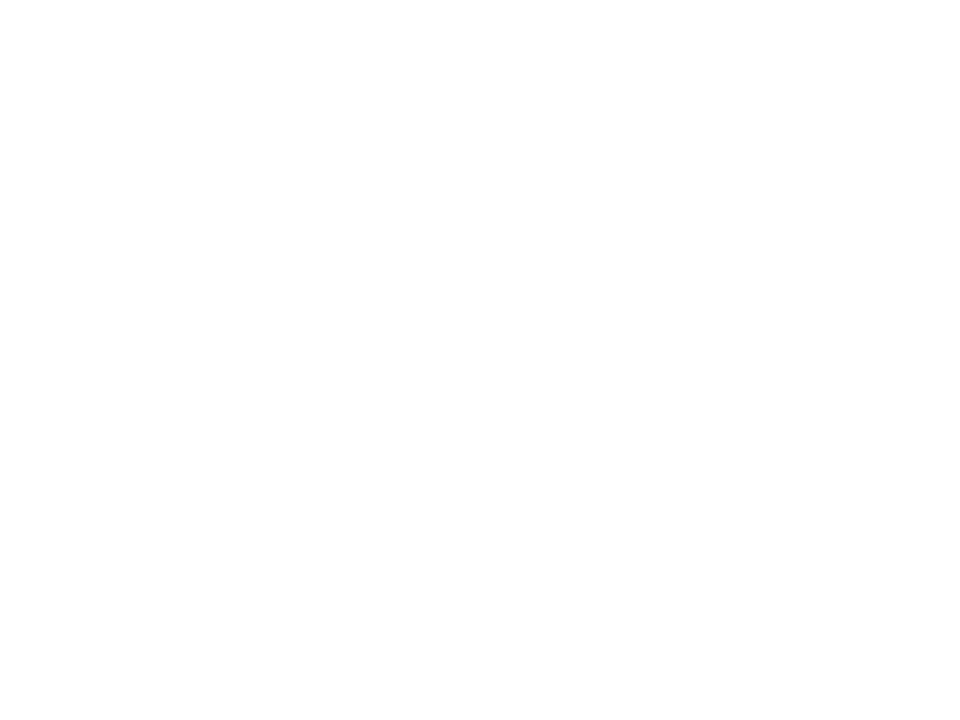

In [127]:

t20.MP1_6 <- t20.MP1_6[rev(rownames(t20.MP1_6)),]

t20.MP1_6$Term <- rownames(t20.MP1_6)


t20.MP1_6$Term <- factor(t20.MP1_6$Term, levels = t20.MP1_6$Term)
ggplot(t20.MP1_6, aes(x = Term , y =  Qscore.167, 
                                  fill=P.val.167)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip()+ theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))


ERROR while rich displaying an object: Error in `geom_col()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'Qscore.S410' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error =

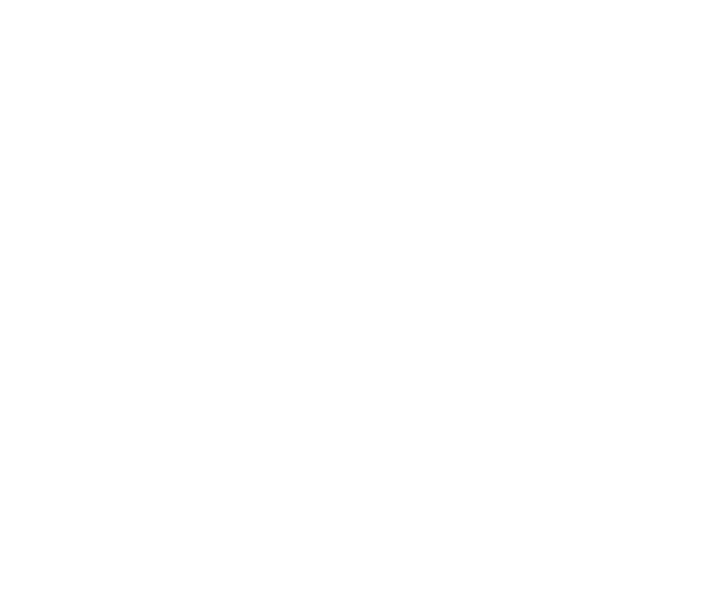

In [128]:
options(repr.plot.width=6, repr.plot.height=5)

t20.MP1_6$Term <- rownames(t20.MP1_6)


t20.MP1_6$Term <- factor(t20.MP1_6$Term, levels = t20.MP1_6$Term)
ggplot(t20.MP1_6, aes(x = Term , y =  Qscore.S410, 
                                  fill=P.val.S410)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip()+ theme_bw() + 
theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"), axis.text.y= element_text(colour="black"))


ERROR while rich displaying an object: Error in `geom_col()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'Qscore.S410' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error =

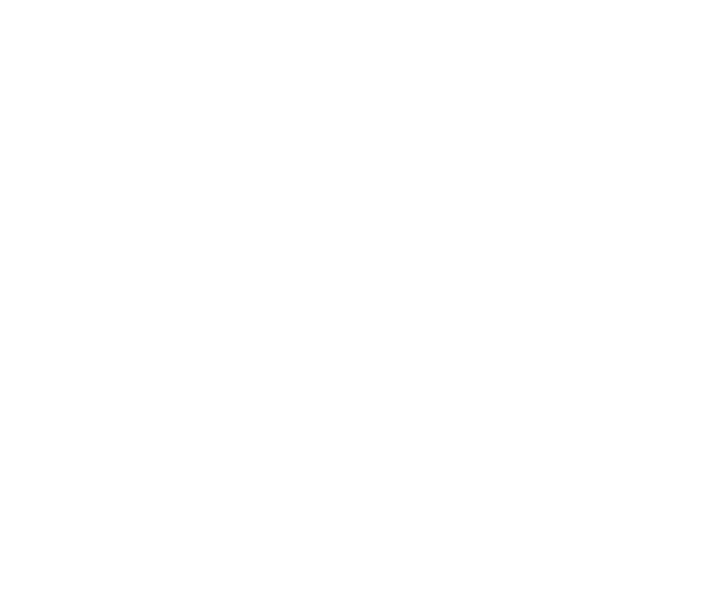

In [129]:
t20.MP1_6$Term <- rownames(t20.MP1_6)


t20.MP1_6$Term <- factor(t20.MP1_6$Term, levels = t20.MP1_6$Term)
ggplot(t20.MP1_6, aes(x = Term , y =  Qscore.S410, 
                                  fill=P.val.S410)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip()+ theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))


In [130]:
t_heat.map

,Unnamed..0,MP1,MP2,MP3,MP4,MP5,MP6,Max
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCF4,TCF4,0.0000000,0.0000000,0.7263154,0.0000000,0.0000000,0.0000000,MP3
ATG7,ATG7,0.0000000,0.8793797,0.0000000,0.0000000,0.0000000,0.0000000,MP2
KCNMA1,KCNMA1,0.0000000,1.2633982,0.0000000,0.0000000,0.0000000,0.0000000,MP2
PSAP,PSAP,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8146100,MP6
UBE2E2,UBE2E2,0.4683059,0.8009265,0.0000000,0.0000000,0.4864155,0.0000000,MP2
PPIA,PPIA,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8080121,MP6
HSP90AB1,HSP90AB1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7839207,MP6
ACTG1,ACTG1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8680159,MP6
FGFR1,FGFR1,0.5250377,0.0000000,0.0000000,0.0000000,0.0000000,0.7897960,MP6


In [131]:
samp <- "MP1"
genes <- rownames(filter(t_heat.map, Max == samp))


filtered_df <- subset(t_heat.map, Max != "MP1" & Max != "MP6")
genes = rownames(filtered_df)

# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
mylist <-  read.csv(file="t100_genes_per_metaprogram.csv")
dbs <- c("MSigDB_Hallmark_2020")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_1 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr_mp1 <- mut_enr_1[1:25,]#[1:500,]


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


[1] 28 10

[1] 28 10

[1] 13 10

In [132]:
h_mut_enr_mp1

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,UV Response Dn,10/144,1.324023e-10,3.707265e-09,0,0,23.078358,524.9213193,NOTCH2;COL1A1;COL3A1;ATXN1;COL1A2;CELF2;DLC1;KCNMA1;COL5A2;APBB2,8.4309464
2,Epithelial Mesenchymal Transition,9/200,5.265488e-08,7.371683e-07,0,0,14.306484,239.7696199,NOTCH2;COL1A1;COL3A1;COL1A2;DST;CALD1;COL5A2;FN1;SAT1,6.1324334
3,Mitotic Spindle,6/199,9.500195e-05,8.866849e-04,0,0,9.021487,83.5535258,NOTCH2;AKAP13;DOCK4;TRIO;DST;DOCK2,3.0522307
4,Angiogenesis,3/36,3.179926e-04,2.225948e-03,0,0,25.471191,205.1317864,COL3A1;COL5A2;PTK2,2.6524849
5,Interferon Alpha Response,3/97,5.589050e-03,2.589339e-02,0,0,8.914594,46.2395171,CD74;HLA-C;B2M,1.5868111
6,Notch Signaling,2/32,6.234517e-03,2.589339e-02,0,0,18.422222,93.5416741,NOTCH2;MAML2,1.5868111
7,Interferon Gamma Response,4/200,6.473348e-03,2.589339e-02,0,0,5.752187,28.9913763,CD74;RNF213;HLA-B;B2M,1.5868111
8,IL-2/STAT5 Signaling,3/199,3.758185e-02,9.686877e-02,0,0,4.253377,13.9563263,RABGAP1L;HIPK2;CDC42SE2,1.0138162
9,Myogenesis,3/200,3.805559e-02,9.686877e-02,0,0,4.231572,13.8317710,MEF2A;COL1A1;COL3A1,1.0138162


In [133]:
samp <- "MP1"
genes <- rownames(filter(t_heat.map, Max == samp))


filtered_df <- subset(t_heat.map, Max != "MP1" & Max != "MP6")
genes = rownames(filtered_df)


library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature
mylist <-  read.csv(file="t100_genes_per_metaprogram.csv")
dbs <- c("MSigDB_Hallmark_2020")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
mut_enr_go<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
mut_enr_1 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr[1:25,]#[1:500,]
h_mut_enr_other <- mut_enr_1[1:25,]#[1:500,]


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


[1] 28 10

[1] 28 10

[1] 13 10

In [134]:
h_mut_enr_other

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,UV Response Dn,10/144,1.324023e-10,3.707265e-09,0,0,23.078358,524.9213193,NOTCH2;COL1A1;COL3A1;ATXN1;COL1A2;CELF2;DLC1;KCNMA1;COL5A2;APBB2,8.4309464
2,Epithelial Mesenchymal Transition,9/200,5.265488e-08,7.371683e-07,0,0,14.306484,239.7696199,NOTCH2;COL1A1;COL3A1;COL1A2;DST;CALD1;COL5A2;FN1;SAT1,6.1324334
3,Mitotic Spindle,6/199,9.500195e-05,8.866849e-04,0,0,9.021487,83.5535258,NOTCH2;AKAP13;DOCK4;TRIO;DST;DOCK2,3.0522307
4,Angiogenesis,3/36,3.179926e-04,2.225948e-03,0,0,25.471191,205.1317864,COL3A1;COL5A2;PTK2,2.6524849
5,Interferon Alpha Response,3/97,5.589050e-03,2.589339e-02,0,0,8.914594,46.2395171,CD74;HLA-C;B2M,1.5868111
6,Notch Signaling,2/32,6.234517e-03,2.589339e-02,0,0,18.422222,93.5416741,NOTCH2;MAML2,1.5868111
7,Interferon Gamma Response,4/200,6.473348e-03,2.589339e-02,0,0,5.752187,28.9913763,CD74;RNF213;HLA-B;B2M,1.5868111
8,IL-2/STAT5 Signaling,3/199,3.758185e-02,9.686877e-02,0,0,4.253377,13.9563263,RABGAP1L;HIPK2;CDC42SE2,1.0138162
9,Myogenesis,3/200,3.805559e-02,9.686877e-02,0,0,4.231572,13.8317710,MEF2A;COL1A1;COL3A1,1.0138162


In [135]:
samp <- c("MP6", "MP1")
genes <- rownames(filter(t_heat.map, Max %in% samp))


listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
if (is.null(dbs)) websiteLive <- FALSE
if (websiteLive) head(dbs)
# read signature


dbs <- c("MSigDB_Hallmark_2020")
if (websiteLive) {
  enriched <- enrichr(genes, dbs)
}
mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
#mut_enr_go<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
dim(mut_enr_go)
#mut_enr_S410 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr_S410 = mut_enr_ch
dim(mut_enr)
write.csv(mut_enr,file="mut_enr_metagenes.csv")
mp = "Meta-program n"
cohort = "Sarcoma"
enrichdbs = "Cancer_Hallmarks_and_Gene_Ontology"
topn = "Top100"
h_mut_enr1 <- mut_enr_S410[1:25,]#[1:500,]
h_mut_enr_mp3 <- h_mut_enr1


Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is available!

WormEnrichr ... 
Connection is available!

YeastEnrichr ... 
Connection is available!

FishEnrichr ... 
Connection is available!

OxEnrichr ... 
Connection is available!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



,geneCoverage,genesPerTerm,libraryName,link,numTerms,appyter,categoryId
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,13362,275,Genome_Browser_PWMs,http://hgdownload.cse.ucsc.edu/goldenPath/hg18/database/,615,ea115789fcbf12797fd692cec6df0ab4dbc79c6a,1
2,27884,1284,TRANSFAC_and_JASPAR_PWMs,http://jaspar.genereg.net/html/DOWNLOAD/,326,7d42eb43a64a4e3b20d721fc7148f685b53b6b30,1
3,6002,77,Transcription_Factor_PPIs,,290,849f222220618e2599d925b6b51868cf1dab3763,1
4,47172,1370,ChEA_2013,http://amp.pharm.mssm.edu/lib/cheadownload.jsp,353,7ebe772afb55b63b41b79dd8d06ea0fdd9fa2630,7
5,47107,509,Drug_Perturbations_from_GEO_2014,http://www.ncbi.nlm.nih.gov/geo/,701,ad270a6876534b7cb063e004289dcd4d3164f342,7
6,21493,3713,ENCODE_TF_ChIP-seq_2014,http://genome.ucsc.edu/ENCODE/downloads.html,498,497787ebc418d308045efb63b8586f10c526af51,7


Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


[1] 27 10

[1] 28 10

[1] 13 10

In [136]:
mut_enr_ch

Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
Epithelial Mesenchymal Transition,9/200,1.889132e-08,5.100656e-07,0,0,16.321025,290.262306,VCAN;COL5A1;COL4A1;COL6A2;COL6A3;FLNA;VIM;FSTL1;FBN1,6.2923740
Angiogenesis,4/36,5.883394e-06,7.942582e-05,0,0,40.125000,483.240491,APP;VCAN;FSTL1;FGFR1,4.1000383
Myogenesis,5/200,5.183636e-04,3.498955e-03,0,0,8.297184,62.766814,APP;GSN;COL6A2;MYH9;COL6A3,2.4560617
Apical Junction,5/200,5.183636e-04,3.498955e-03,0,0,8.297184,62.766814,VCAN;MYH9;ACTB;ACTG1;FBN1,2.4560617
Apoptosis,4/161,1.978327e-03,1.068296e-02,0,0,8.126978,50.594531,APP;GSN;DPYD;TIMP2,1.9713082
Mitotic Spindle,4/199,4.236895e-03,1.663502e-02,0,0,6.530687,35.683179,DYNC1H1;GSN;MYH9;FLNA,1.7789766
Myc Targets V1,4/200,4.312784e-03,1.663502e-02,0,0,6.497038,35.383982,HSP90AB1;CANX;HNRNPA2B1;PPIA,1.7789766
Coagulation,3/138,1.071619e-02,3.616716e-02,0,0,6.983774,31.678394,GSN;FYN;FBN1,1.4416856
Cholesterol Homeostasis,2/74,2.487189e-02,5.486980e-02,0,0,8.620660,31.844864,S100A11;ACTG1,1.2606666


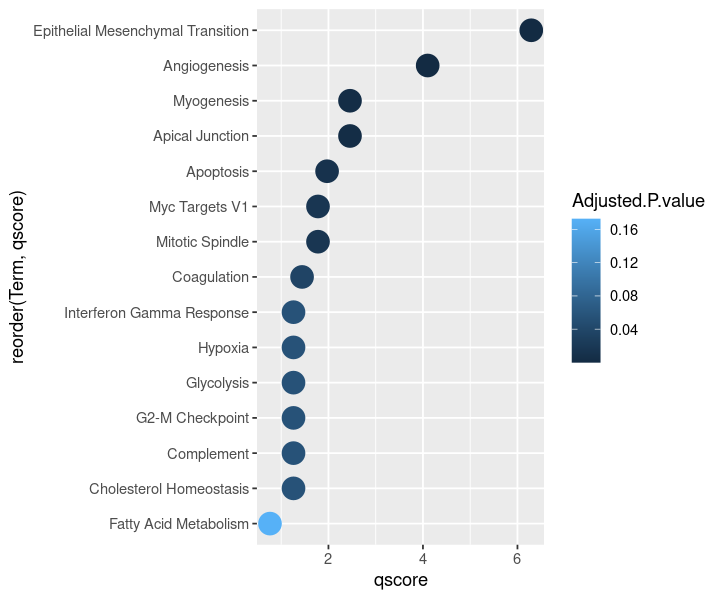

In [137]:
ggplot(h_mut_enr_mp3[1:15,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value, dotsize =Adjusted.P.value)) +
  geom_point(size = 6) 

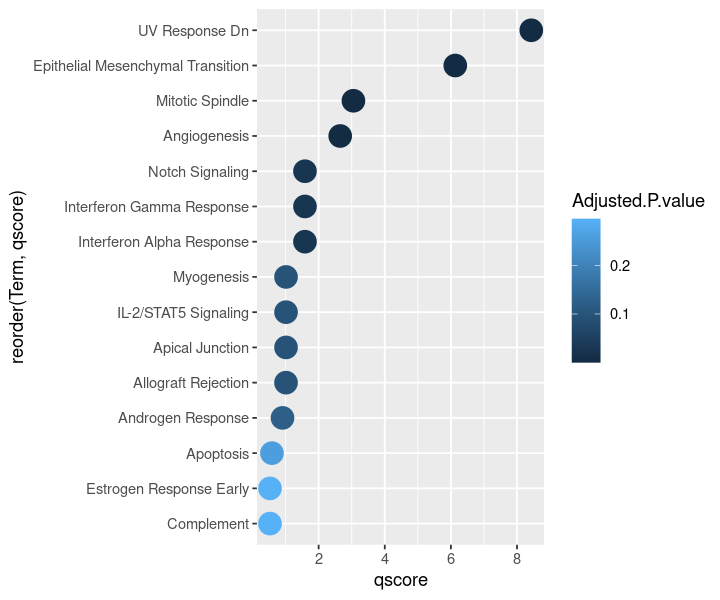

In [138]:
ggplot(h_mut_enr_other[1:15,], aes(x = qscore , y = reorder(Term, qscore), 
                                  color=Adjusted.P.value, dotsize =Adjusted.P.value)) +
  geom_point(size = 6) 

In [139]:
h_mut_enr_other_t <- h_mut_enr_other[rev(rownames(h_mut_enr_other)),]


pathways<- (unique(c(h_mut_enr_mp3[1:13,]$Term, tail(h_mut_enr_other_t, n = 14)$Term)))

length(pathways)

[1] 20

In [140]:
pathways

[1] "Epithelial Mesenchymal Transition" "Angiogenesis"                     
 [3] "Myogenesis"                        "Apical Junction"                  
 [5] "Apoptosis"                         "Mitotic Spindle"                  
 [7] "Myc Targets V1"                    "Coagulation"                      
 [9] "Cholesterol Homeostasis"           "Hypoxia"                          
[11] "G2-M Checkpoint"                   "Interferon Gamma Response"        
[13] "Complement"                        "Estrogen Response Early"          
[15] "Androgen Response"                 "Allograft Rejection"              
[17] "IL-2/STAT5 Signaling"              "Notch Signaling"                  
[19] "Interferon Alpha Response"         "UV Response Dn"

In [141]:
t20.167.S410 <- (h_mut_enr_other[h_mut_enr_other$Term %in% pathways,])
rownames(t20.167.S410) <- t20.167.S410$Term
t20.167.S410<- t20.167.S410[pathways,]
#temp <- t20.167.S410[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]

t20.167.S410

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
Epithelial Mesenchymal Transition,Epithelial Mesenchymal Transition,9/200,5.265488e-08,7.371683e-07,0,0,14.306484,239.7696199,NOTCH2;COL1A1;COL3A1;COL1A2;DST;CALD1;COL5A2;FN1;SAT1,6.1324334
Angiogenesis,Angiogenesis,3/36,3.179926e-04,2.225948e-03,0,0,25.471191,205.1317864,COL3A1;COL5A2;PTK2,2.6524849
Myogenesis,Myogenesis,3/200,3.805559e-02,9.686877e-02,0,0,4.231572,13.8317710,MEF2A;COL1A1;COL3A1,1.0138162
Apical Junction,Apical Junction,3/200,3.805559e-02,9.686877e-02,0,0,4.231572,13.8317710,PTPRC;EXOC4;PTK2,1.0138162
Apoptosis,Apoptosis,2/161,1.196947e-01,2.578040e-01,0,0,3.453354,7.3308176,SAT1;PTK2,0.5887103
Mitotic Spindle,Mitotic Spindle,6/199,9.500195e-05,8.866849e-04,0,0,9.021487,83.5535258,NOTCH2;AKAP13;DOCK4;TRIO;DST;DOCK2,3.0522307
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Coagulation,Coagulation,1/138,4.014884e-01,5.109852e-01,0,0,1.978702,1.8057174,FN1,0.2915917
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [142]:
t20.167.S410 <- (h_mut_enr_other[h_mut_enr_other$Term %in% pathways,])
rownames(t20.167.S410) <- t20.167.S410$Term

t20.167.S410<- t20.167.S410[pathways,]
t20.167.S410$Term <- pathways
rownames(t20.167.S410) <- t20.167.S410$Term

t20.167.S410

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
Epithelial Mesenchymal Transition,Epithelial Mesenchymal Transition,9/200,5.265488e-08,7.371683e-07,0,0,14.306484,239.7696199,NOTCH2;COL1A1;COL3A1;COL1A2;DST;CALD1;COL5A2;FN1;SAT1,6.1324334
Angiogenesis,Angiogenesis,3/36,3.179926e-04,2.225948e-03,0,0,25.471191,205.1317864,COL3A1;COL5A2;PTK2,2.6524849
Myogenesis,Myogenesis,3/200,3.805559e-02,9.686877e-02,0,0,4.231572,13.8317710,MEF2A;COL1A1;COL3A1,1.0138162
Apical Junction,Apical Junction,3/200,3.805559e-02,9.686877e-02,0,0,4.231572,13.8317710,PTPRC;EXOC4;PTK2,1.0138162
Apoptosis,Apoptosis,2/161,1.196947e-01,2.578040e-01,0,0,3.453354,7.3308176,SAT1;PTK2,0.5887103
Mitotic Spindle,Mitotic Spindle,6/199,9.500195e-05,8.866849e-04,0,0,9.021487,83.5535258,NOTCH2;AKAP13;DOCK4;TRIO;DST;DOCK2,3.0522307
Myc Targets V1,Myc Targets V1,NA,NA,NA,NA,NA,NA,NA,NA,NA
Coagulation,Coagulation,1/138,4.014884e-01,5.109852e-01,0,0,1.978702,1.8057174,FN1,0.2915917
Cholesterol Homeostasis,Cholesterol Homeostasis,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [143]:
temp <- t20.167.S410[,c('Adjusted.P.value','Odds.Ratio', 'Combined.Score', 'qscore')]
t20.167.S410 <- t20.167.S410[,c()]
t20.167.S410$P.val.167 <- temp$Adjusted.P.value
t20.167.S410$Qscore.167 <- temp$qscore
temp <- (h_mut_enr_mp3[h_mut_enr_mp3$Term %in% pathways,])
rownames(temp) <- temp$Term
temp<- temp[pathways,]
t20.167.S410$P.val.S410 <- temp$Adjusted.P.value
t20.167.S410$Qscore.S410 <- temp$qscore
t20.167.S410$Qscore.S410[is.na(t20.167.S410$Qscore.S410)] <- 0
t20.167.S410$P.val.S410[is.na(t20.167.S410$P.val.S410)] <- 1
t20.167.S410$Qscore.167[is.na(t20.167.S410$Qscore.167)] <- 0
t20.167.S410$P.val.167[is.na(t20.167.S410$P.val.167)] <- 1

library("scales")
 
t20.167.S410$Qscore.S410 <- rescale(t20.167.S410$Qscore.S410, to=c(0,1))
t20.167.S410$Qscore.167 <- rescale(t20.167.S410$Qscore.167, to=c(0,1))

t20.167.S410


,P.val.167,Qscore.167,P.val.S410,Qscore.S410
,<dbl>,<dbl>,<dbl>,<dbl>
Epithelial Mesenchymal Transition,7.371683e-07,0.72737188,5.100656e-07,1.00000000
Angiogenesis,2.225948e-03,0.31461295,7.942582e-05,0.65158846
Myogenesis,9.686877e-02,0.12024940,3.498955e-03,0.39032354
Apical Junction,9.686877e-02,0.12024940,3.498955e-03,0.39032354
Apoptosis,2.578040e-01,0.06982731,1.068296e-02,0.31328529
Mitotic Spindle,8.866849e-04,0.36202706,1.663502e-02,0.28271946
Myc Targets V1,1.000000e+00,0.00000000,1.663502e-02,0.28271946
Coagulation,5.109852e-01,0.03458588,3.616716e-02,0.22911633
Cholesterol Homeostasis,1.000000e+00,0.00000000,5.486980e-02,0.20034833


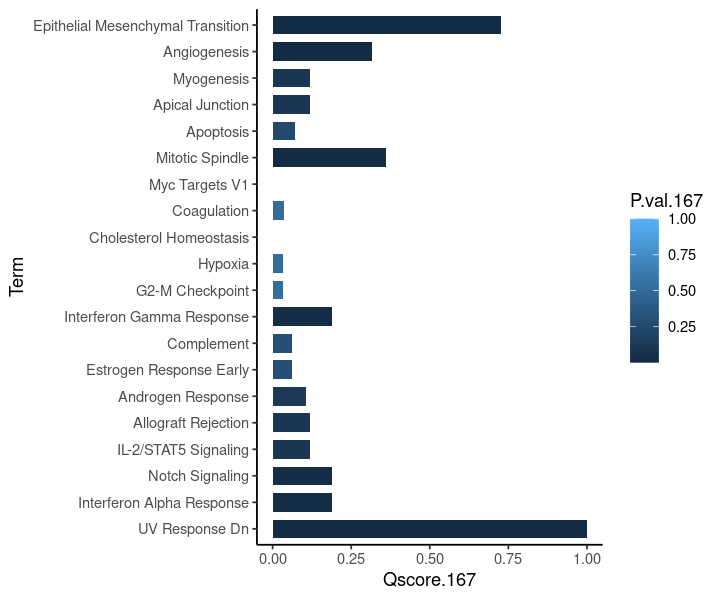

In [144]:

t20.167.S410 <- t20.167.S410[rev(rownames(t20.167.S410)),]

t20.167.S410$Term <- rownames(t20.167.S410)


t20.167.S410$Term <- factor(t20.167.S410$Term, levels = t20.167.S410$Term)
ggplot(t20.167.S410, aes(x = Term , y =  Qscore.167, 
                                  fill=P.val.167)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() + theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))


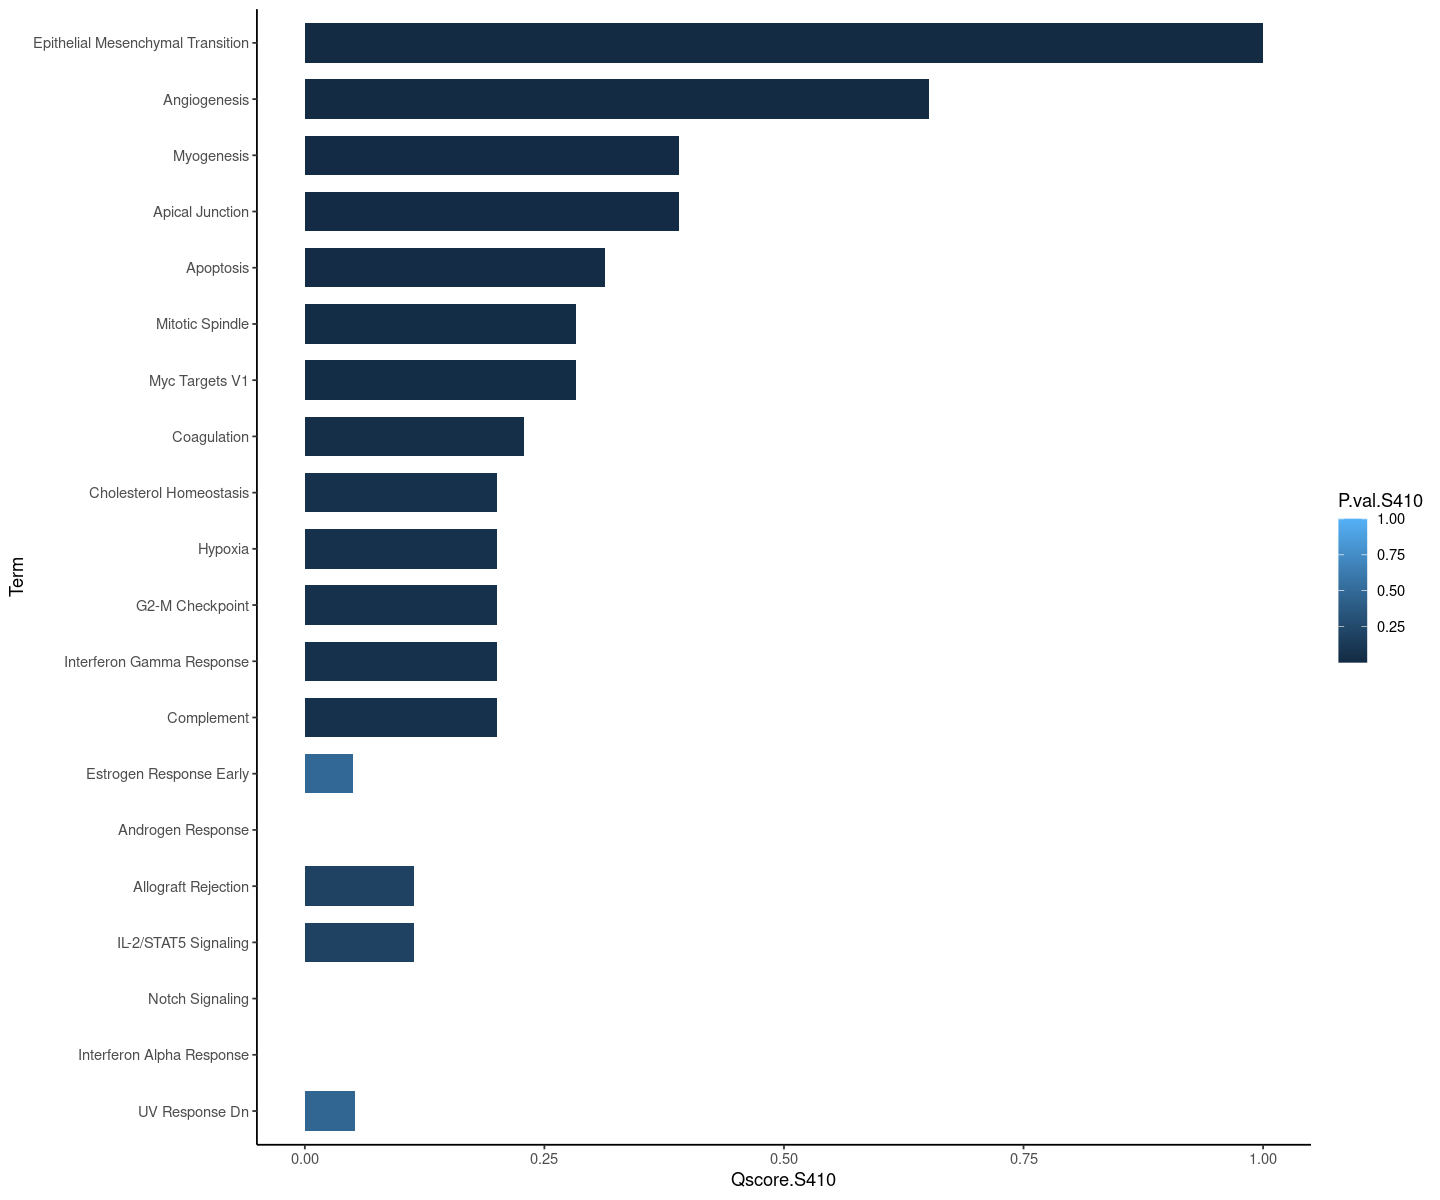

In [170]:
options(repr.plot.width=12, repr.plot.height=10)
ggplot(t20.167.S410, aes(x = Term , y =  Qscore.S410, 
                                  fill=P.val.S410)) +
  geom_col( width = 0.7) +
  scale_color_gradient(limits = c(0, 1)) + coord_flip() + theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))

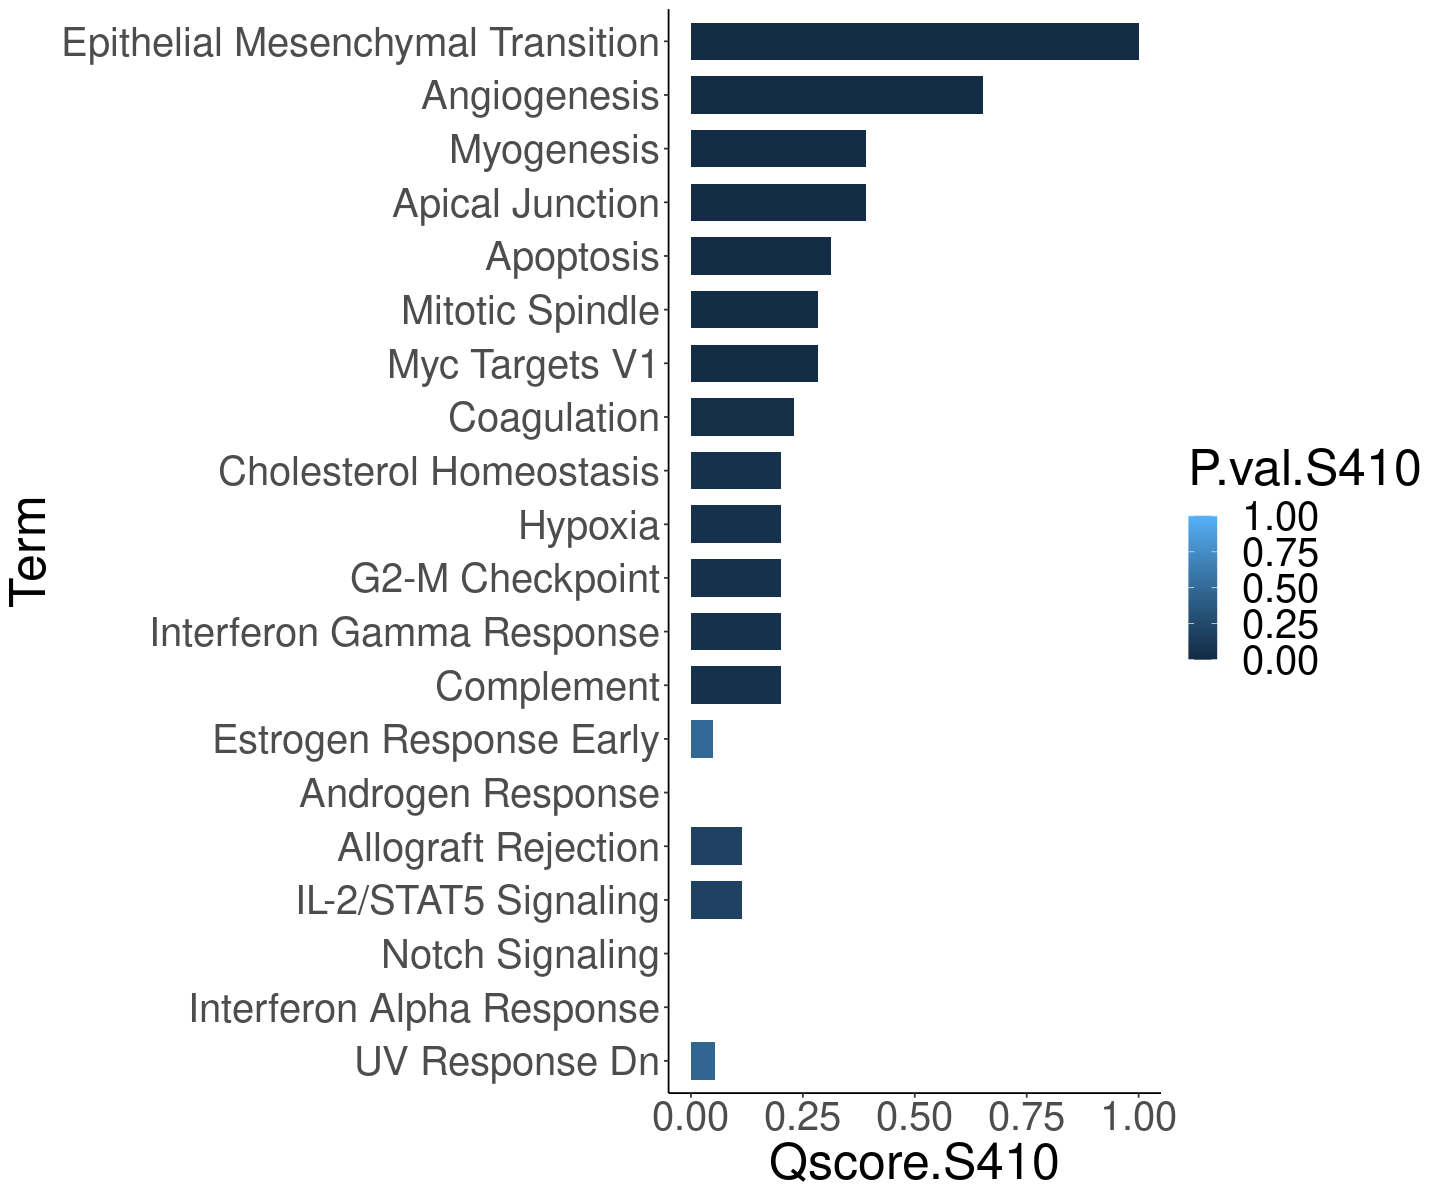

In [172]:
ggplot(t20.167.S410, aes(x = Term, y = Qscore.S410, fill = P.val.S410)) +
  geom_col(width = 0.7) +
  scale_fill_gradient(limits = c(0, 1)) +  # Use scale_fill_gradient for color fill
  coord_flip() +
  theme_bw() +
  theme(
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(colour = "black"),
    text = element_text(size = 30, color = "black")  # Adjust the text size and color
  )

In [146]:
pathways

[1] "Epithelial Mesenchymal Transition" "Angiogenesis"                     
 [3] "Myogenesis"                        "Apical Junction"                  
 [5] "Apoptosis"                         "Mitotic Spindle"                  
 [7] "Myc Targets V1"                    "Coagulation"                      
 [9] "Cholesterol Homeostasis"           "Hypoxia"                          
[11] "G2-M Checkpoint"                   "Interferon Gamma Response"        
[13] "Complement"                        "Estrogen Response Early"          
[15] "Androgen Response"                 "Allograft Rejection"              
[17] "IL-2/STAT5 Signaling"              "Notch Signaling"                  
[19] "Interferon Alpha Response"         "UV Response Dn"

In [147]:
t20.167.S410

,P.val.167,Qscore.167,P.val.S410,Qscore.S410,Term
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
UV Response Dn,3.707265e-09,1.00000000,4.661062e-01,0.05268522,UV Response Dn
Interferon Alpha Response,2.589339e-02,0.18821269,1.000000e+00,0.00000000,Interferon Alpha Response
Notch Signaling,2.589339e-02,0.18821269,1.000000e+00,0.00000000,Notch Signaling
IL-2/STAT5 Signaling,9.686877e-02,0.12024940,1.906732e-01,0.11437819,IL-2/STAT5 Signaling
Allograft Rejection,9.686877e-02,0.12024940,1.906732e-01,0.11437819,Allograft Rejection
Androgen Response,1.236389e-01,0.10768007,1.000000e+00,0.00000000,Androgen Response
Estrogen Response Early,2.960595e-01,0.06270007,4.854212e-01,0.04988280,Estrogen Response Early
Complement,2.960595e-01,0.06270007,5.486980e-02,0.20034833,Complement
Interferon Gamma Response,2.589339e-02,0.18821269,5.486980e-02,0.20034833,Interferon Gamma Response


In [150]:
new_geneset <- c('ELMO1', 'ARAP2', 'DOCK2', 'B2M', 'CDC42SE2', 'LRBA', 'CELF2',
       'ARID1B', 'PTPRC', 'ITPR2', 'SAT1', 'ZEB2', 'FCHSD2', 'SFMBT2', 'QKI',
       'DOCK4', 'ETV6', 'ARHGAP15', 'CD74', 'RNF213', 'ARHGAP26', 'UBE2E2',
       'KCNMA1', 'ATG7', 'CHST11', 'EBF1', 'COL5A1',
       'RBMS3', 'FBN1', 'FOXP1', 'CBLB',
       'FOXN3', 'DPYD', 'PTPRG', 'GSN',
       'FSTL1', 'SRRM2',
        'MYCBP2', 'PCDH9', 'COL4A1', 'HIPK2', 'WWOX',
       'TCF4', 'MEF2A', 'MAML2', 'DLC1', 'NOTCH2', 'MIR4435-2HG',
       'EPS8', 'CAMK2D', 'COL5A2', 'FBXL7', 'VPS13B', 'COL1A2',
       'TCF12', 'FNDC3B', 'DST', 'GPC6', 'ZFAND3', 'PRKG1', 'EEF1A1', 'PSAP',
       'PPIA', 'HSP90AB1', 'CANX', 'FLNA', 'AHNAK', 'S100A11', 'MT2A', 'TIMP2',
       'EEF2', 'COL6A1', 'NORAD', 'ACTG1', 'VIM')

In [156]:
t_heat.map

t_heat.map[new_geneset,]


,Unnamed..0,MP1,MP2,MP3,MP4,MP5,MP6,Max
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCF4,TCF4,0.0000000,0.0000000,0.7263154,0.0000000,0.0000000,0.0000000,MP3
ATG7,ATG7,0.0000000,0.8793797,0.0000000,0.0000000,0.0000000,0.0000000,MP2
KCNMA1,KCNMA1,0.0000000,1.2633982,0.0000000,0.0000000,0.0000000,0.0000000,MP2
PSAP,PSAP,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8146100,MP6
UBE2E2,UBE2E2,0.4683059,0.8009265,0.0000000,0.0000000,0.4864155,0.0000000,MP2
PPIA,PPIA,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8080121,MP6
HSP90AB1,HSP90AB1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7839207,MP6
ACTG1,ACTG1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8680159,MP6
FGFR1,FGFR1,0.5250377,0.0000000,0.0000000,0.0000000,0.0000000,0.7897960,MP6


,Unnamed..0,MP1,MP2,MP3,MP4,MP5,MP6,Max
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ELMO1,ELMO1,0.3934902,0.0000000,0.0000000,1.0837893,0.0000000,0,MP4
ARAP2,ARAP2,0.0000000,0.0000000,0.0000000,1.1537660,0.0000000,0,MP4
DOCK2,DOCK2,0.0000000,0.8198990,0.0000000,0.9586530,0.0000000,0,MP4
B2M,B2M,0.0000000,0.0000000,0.0000000,1.6946260,0.0000000,0,MP4
CDC42SE2,CDC42SE2,0.0000000,0.0000000,0.0000000,1.1902238,0.0000000,0,MP4
LRBA,LRBA,0.0000000,0.0000000,0.0000000,0.8301220,0.0000000,0,MP4
CELF2,CELF2,0.0000000,0.0000000,0.0000000,1.1954129,0.0000000,0,MP4
ARID1B,ARID1B,0.8523807,0.7419785,0.7306813,0.8919085,0.7042473,0,MP4
PTPRC,PTPRC,0.0000000,1.2922423,0.0000000,1.6501939,0.0000000,0,MP4


In [157]:
filtered_dataframe <- t_heat.map[new_geneset,]

In [169]:
samp <- c("MP6")
genes <- rownames(filter(filtered_dataframe, Max %in% samp))

# read signature
dbs <- c("MSigDB_Hallmark_2020")
enriched <- enrichr(genes, dbs)

mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
#mut_enr_go<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
dim(mut_enr_ch)
#mut_enr_S410 <- rbind.data.frame(mut_enr_ch,mut_enr_go)
mut_enr_S410 = mut_enr_ch
dim(mut_enr)
print(genes)
mut_enr_ch[1:10,]

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
Parsing results... Done.


[1] 16 10

[1] 13 10

 [1] "EEF1A1"   "PSAP"     "PPIA"     "HSP90AB1" "CANX"     "FLNA"    
 [7] "AHNAK"    "S100A11"  "MT2A"     "TIMP2"    "EEF2"     "COL6A1"  
[13] "NORAD"    "ACTG1"    "VIM"     


,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,qscore
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,Myc Targets V1,3/200,0.0004101765,0.006562824,0,0,25.111675,195.84402,HSP90AB1;CANX;PPIA,2.1829092
2,Cholesterol Homeostasis,2/74,0.0013745173,0.010996139,0,0,42.549145,280.38409,S100A11;ACTG1,1.9587598
3,IL-2/STAT5 Signaling,2/199,0.0094982099,0.030688027,0,0,15.453339,71.96082,AHNAK;COL6A1,1.5130310
4,mTORC1 Signaling,2/200,0.0095900085,0.030688027,0,0,15.374514,71.44588,CANX;PPIA,1.5130310
5,Epithelial Mesenchymal Transition,2/200,0.0095900085,0.030688027,0,0,15.374514,71.44588,FLNA;VIM,1.5130310
6,Unfolded Protein Response,1/113,0.0815059469,0.139986909,0,0,12.674107,31.77499,EEF2,0.8539126
7,Apoptosis,1/161,0.1142148810,0.139986909,0,0,8.850446,19.20258,TIMP2,0.8539126
8,Mitotic Spindle,1/199,0.1393349236,0.139986909,0,0,7.138167,14.06843,FLNA,0.8539126
9,Xenobiotic Metabolism,1/200,0.1399869087,0.139986909,0,0,7.101938,13.96388,MT2A,0.8539126
